In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [4]:
!unzip MNIST.zip

Archive:  MNIST.zip
  inflating: MNIST/processed/test.pt  
  inflating: MNIST/processed/training.pt  
  inflating: MNIST/raw/t10k-images-idx3-ubyte  
 extracting: MNIST/raw/t10k-images-idx3-ubyte.gz  
  inflating: MNIST/raw/t10k-labels-idx1-ubyte  
 extracting: MNIST/raw/t10k-labels-idx1-ubyte.gz  
  inflating: MNIST/raw/train-images-idx3-ubyte  
 extracting: MNIST/raw/train-images-idx3-ubyte.gz  
  inflating: MNIST/raw/train-labels-idx1-ubyte  
 extracting: MNIST/raw/train-labels-idx1-ubyte.gz  


In [6]:
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),target_transform=None, download=True)

mnist_test 길이:  10000
image data 형태:  torch.Size([1, 28, 28])
label:  7


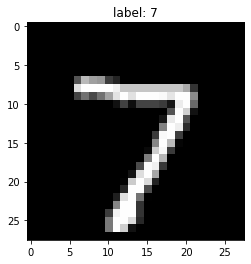

In [10]:
print ("mnist_test 길이: ", len(mnist_test))

#데이터 하나 형태
image,label=mnist_test.__getitem__(0) #0번째 데이터
print ("image data 형태: ",image.size())
print ("label: ",label)

#그리기
img=image.numpy() #image 타입을 numpy로 변환(1,28,28)
plt.title("label: %d"%label)
plt.imshow(img[0],cmap='gray')
plt.show()

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    e_x=np.exp(x)
    return e_x/np.sum(e_x)

In [23]:
#multi-layered perceptron
# #of units in each layer :28*28 - 256 - 128 - 10
class MyMLP:
    def __init__(self,n_input,n_hidden1,n_hidden2,n_output):
        #W^(1): layer1-> layer2에 매핑되는 weight
        self.W1=np.zeros((n_hidden1,n_input),dtype=np.float32)
        self.b1=np.zeros((n_hidden1,),dtype=np.float32)
        
        self.W2=np.zeros((n_hidden2,n_hidden1),dtype=np.float32)
        self.b2=np.zeros((n_hidden2,),dtype=np.float32)
        
        self.W3=np.zeros((n_output,n_hidden2),dtype=np.float32)
        self.b3=np.zeros((n_output,),dtype=np.float32)
        
    
    def __call__(self,x):
        #(1,28,28) - >(28,28)
        x=x.reshape(-1) #일렬로피기
        h1=sigmoid(np.dot(self.W1,x)+self.b1) 
        h2=np.dot(self.W2,h1)+self.b2
        out=np.dot(self.W3,h2)+self.b3
        
        return softmax(out) 

In [24]:
model=MyMLP(28*28, 256,128,10)

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [25]:
weights=np.load('mlp_weight.npz')
model.W1=weights['W1']
model.W2=weights['W2']
model.W3=weights['W3']
model.b1=weights['b1']
model.b2=weights['b2']
model.b3=weights['b3']

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


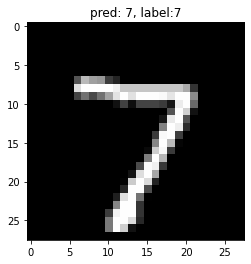

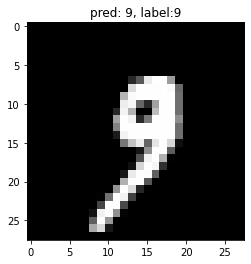

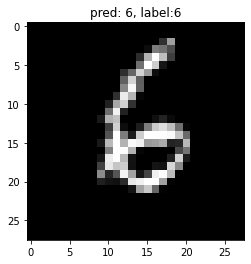

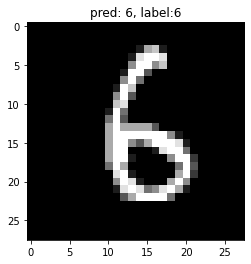

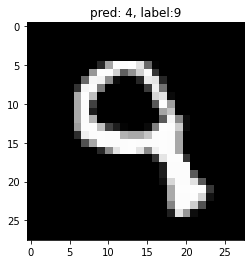

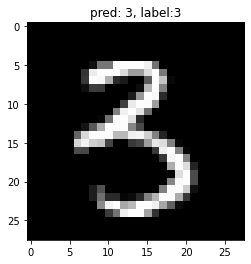

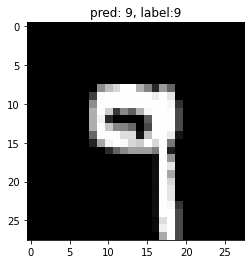

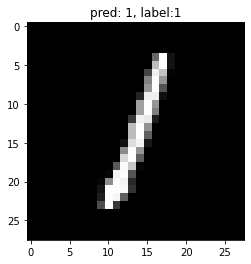

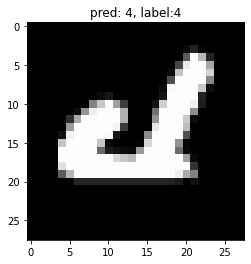

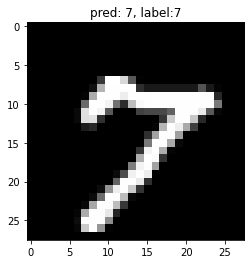

정확도: 91.91


In [26]:
mysum=0

m=len(mnist_test)
cnt=0
for i in range(m):
    image,label=mnist_test.__getitem__(i)
    output=model(image)
    
    if (i%1000==0):
        img=image.numpy()
        pred_label=np.argmax(output)
        plt.title("pred: %d, label:%d"%(pred_label, label))
        plt.imshow(img[0],cmap='gray')
        plt.show()
    cnt+=1
    mysum+=(np.argmax(output)==label)

print("정확도: %.2f"%((float(mysum)/cnt)*100.0))